# Simlified code for creating and visualizing the dataset.

In [13]:
import pandas as pd
import numpy as np

# Parameters
lyft_take_rates = np.arange(3, 6.5, 0.5)  # Lyft take rates ($3–$6 in $0.5 increments)
months = np.arange(1, 13)  # 12 months
total_annual_rideshare_demand = 50000  # Estimated total rideshare demand for Toledo Airport
initial_market_share = 0.10  # 10% initial market share
max_market_share = 0.29  # 29% maximum market share
driver_cac = 500  # Average CAC per driver
rider_cac = 15  # Average CAC per rider

# Logistic growth function for market share
def logistic_growth(t, S_min, S_max, t_mid, k):
    return S_min + (S_max - S_min) / (1 + np.exp(-k * (t - t_mid)))

# Logistic regression for match rate
def logistic_match_rate(take_rate, k, t_0):
    return 60 + (33 / (1 + np.exp(-k * (take_rate - t_0))))

# Rider churn calculation
def calculate_rider_churn(match_rate):
    failure_probability = 1 - (match_rate / 100)
    return (failure_probability * 33) + ((1 - failure_probability) * 10)

# Driver churn calculation
def calculate_driver_churn(take_rate):
    return 3.5 + 0.5 * (take_rate - 3)

# Create the dataset
data = []
for month in months:
    # Market share for the current month
    market_share = logistic_growth(month, initial_market_share, max_market_share, t_mid=6, k=1)
    monthly_rideshare_demand = total_annual_rideshare_demand * market_share
    completed_rides = monthly_rideshare_demand  # Base rides before match rate adjustment
    
    for take_rate in lyft_take_rates:
        # Calculate match rate
        match_rate = logistic_match_rate(take_rate, k=2.5, t_0=4.5)
        new_completed_rides = completed_rides * (match_rate / 100)
        
        # Calculate churn rates
        rider_churn = calculate_rider_churn(match_rate)
        driver_churn = calculate_driver_churn(take_rate)
        
        # Calculate churn costs
        rider_churn_cost = (rider_churn / 100) * rider_cac * new_completed_rides
        driver_churn_cost = (driver_churn / 100) * driver_cac * new_completed_rides / 100  # Driver churn cost scales with drivers
        
        # Total churn cost
        total_churn_cost = rider_churn_cost + driver_churn_cost
        
        # Revenue and profit
        net_revenue = new_completed_rides * take_rate
        net_profit = net_revenue - total_churn_cost
        
        # Append to dataset
        data.append({
            "Month": month,
            "Lyft Take Rate ($)": take_rate,
            "Match Rate (%)": match_rate,
            "Completed Rides": completed_rides,
            "New Completed Rides": new_completed_rides,
            "Rider Churn (%)": rider_churn,
            "Driver Churn (%)": driver_churn,
            "Rider Churn Cost ($)": rider_churn_cost,
            "Driver Churn Cost ($)": driver_churn_cost,
            "Total Churn Cost ($)": total_churn_cost,
            "Net Revenue ($)": net_revenue,
            "Net Profit ($)": net_profit
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (optional)
df.to_csv("lyft_toledo_analysis_with_updated_market_share.csv", index=False)

# Display first few rows for validation
print(df)


    Month  Lyft Take Rate ($)  Match Rate (%)  Completed Rides  \
0       1                 3.0       60.758253      5063.582084   
1       1                 3.5       62.503320      5063.582084   
2       1                 4.0       67.349105      5063.582084   
3       1                 4.5       76.500000      5063.582084   
4       1                 5.0       85.650895      5063.582084   
..    ...                 ...             ...              ...   
79     12                 4.0       67.349105     14476.510080   
80     12                 4.5       76.500000     14476.510080   
81     12                 5.0       85.650895     14476.510080   
82     12                 5.5       90.496680     14476.510080   
83     12                 6.0       92.241747     14476.510080   

    New Completed Rides  Rider Churn (%)  Driver Churn (%)  \
0           3076.544024        19.025602              3.50   
1           3164.906910        18.624236              3.75   
2           3410.2771

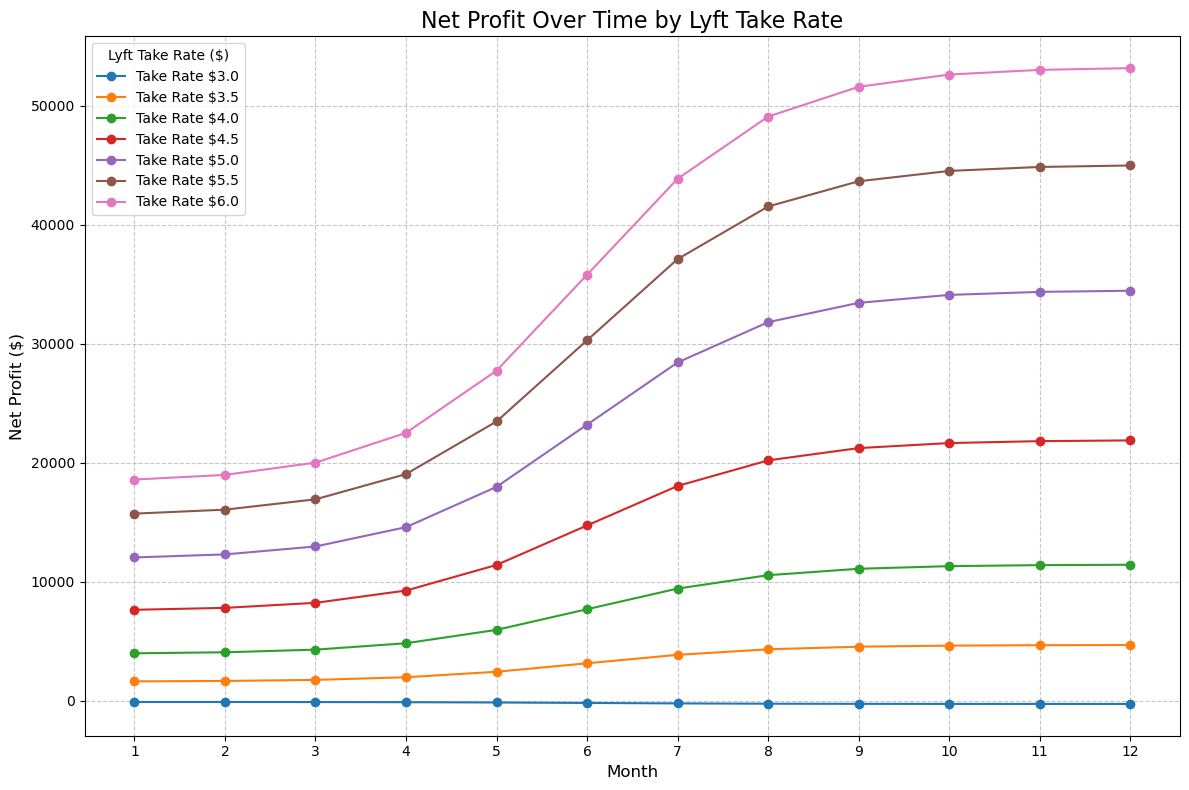

In [14]:
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate to calculate average Net Profit
grouped_profit = df.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Profit ($)'].mean()

# Pivot the data for easier plotting
pivot_profit = grouped_profit.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Profit ($)')

# Plot Net Profit over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_profit.columns:
    plt.plot(pivot_profit.index, pivot_profit[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Profit Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Profit ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_profit.index)
plt.tight_layout()
plt.show()


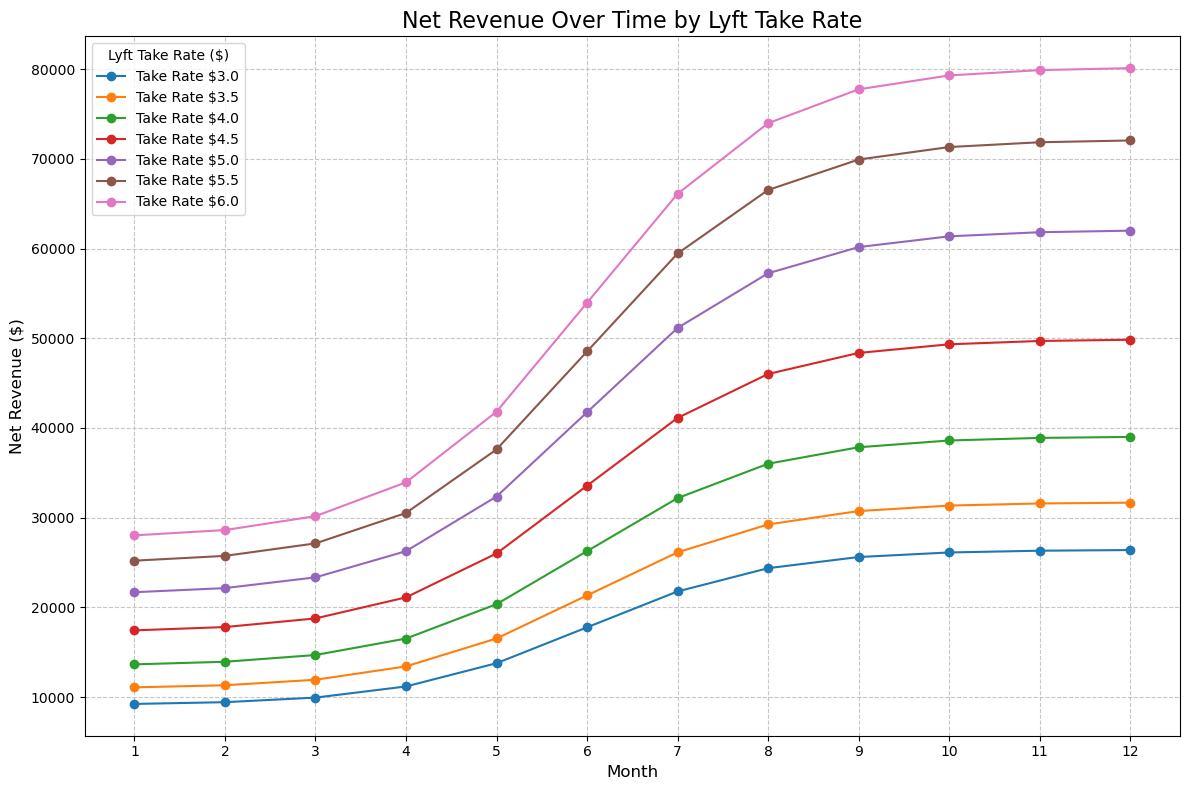

In [15]:
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate to calculate average Net Revenue
grouped_revenue = df.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Net Revenue ($)'].mean()

# Pivot the data for easier plotting
pivot_revenue = grouped_revenue.pivot(index='Month', columns='Lyft Take Rate ($)', values='Net Revenue ($)')

# Plot Net Revenue over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_revenue.columns:
    plt.plot(pivot_revenue.index, pivot_revenue[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Net Revenue Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Revenue ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_revenue.index)
plt.tight_layout()
plt.show()


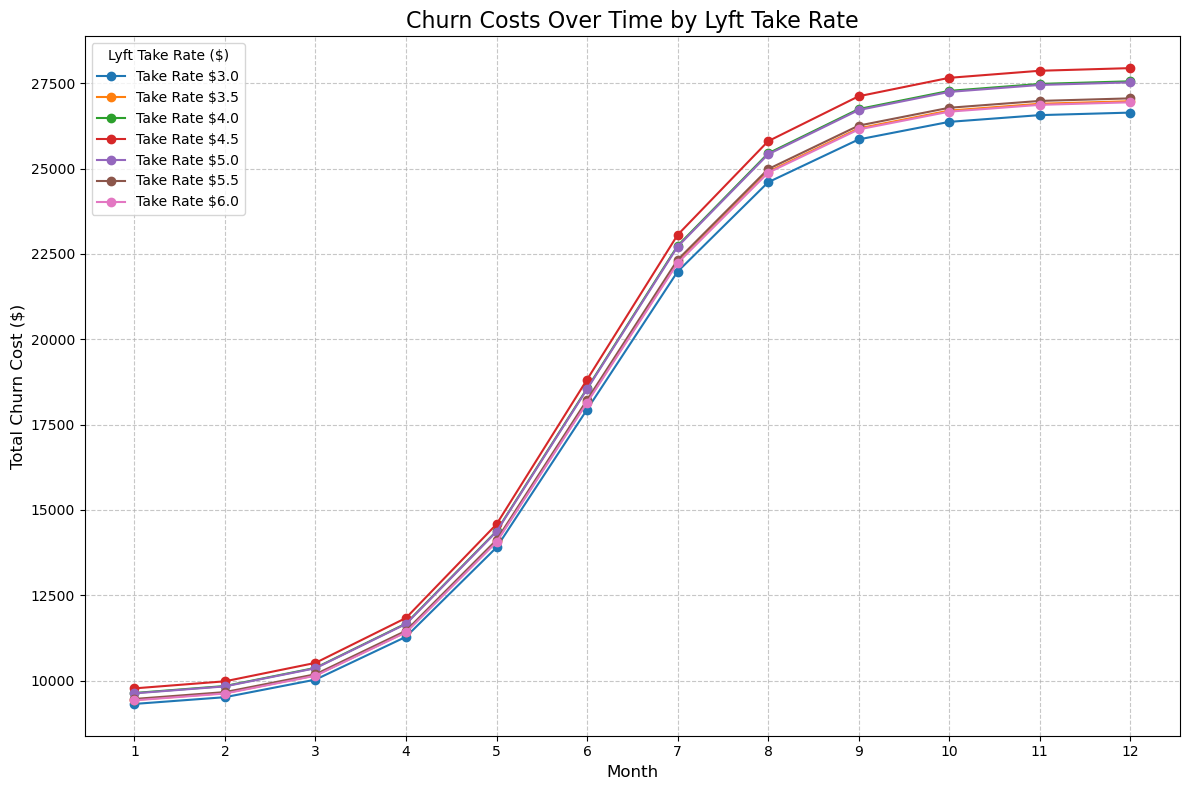

In [16]:
import matplotlib.pyplot as plt

# Group data by Month and Lyft Take Rate to calculate average Total Churn Cost
grouped_churn_cost = df.groupby(['Month', 'Lyft Take Rate ($)'], as_index=False)['Total Churn Cost ($)'].mean()

# Pivot the data for easier plotting
pivot_churn_cost = grouped_churn_cost.pivot(index='Month', columns='Lyft Take Rate ($)', values='Total Churn Cost ($)')

# Plot Total Churn Cost over time for each Lyft Take Rate
plt.figure(figsize=(12, 8))
for column in pivot_churn_cost.columns:
    plt.plot(pivot_churn_cost.index, pivot_churn_cost[column], marker='o', linestyle='-', label=f'Take Rate ${column}')
plt.title('Churn Costs Over Time by Lyft Take Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Churn Cost ($)', fontsize=12)
plt.legend(title='Lyft Take Rate ($)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(pivot_churn_cost.index)
plt.tight_layout()
plt.show()
